# domain-wall type SSH lattice

This code will reproduce the results in Stephan's paper 
https://www.nature.com/articles/s42005-023-01230-z 
---
We will do the following: 
- time dynamics

In [1]:
import sys
root_folder = 'src/'
sys.path.insert(1, root_folder)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, solve
import math as m

from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline                

In [3]:
import functions as fp
from IPython.display import clear_output

In [38]:
N = 10                        # even number
t1, t2 = 1, 0.7              #coupling strength

x,y = 0.48, 0.06   #coordinate in phase diagram 

gamma_AB = x 
gamma_A = gamma_AB
gamma_B = gamma_AB
g_A = gamma_AB + y
g_B = 0

Ns = 100
t_max = 600

T = 1   # probably no need to use T. 
dt = T / Ns

Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)

x = np.zeros((2*N+1)).astype(complex)

# H_test = fp.H(N, g_A, g_B, gamma_A, gamma_B, t1, t2, x)
# print(H_test)

In [39]:
x_save = fp.integrate_RK4(N, g_A, g_B, gamma_A, gamma_B, t1, t2, Nt, tab_t,dt)

(21, 60000)
(11, 60000)
(60000,)


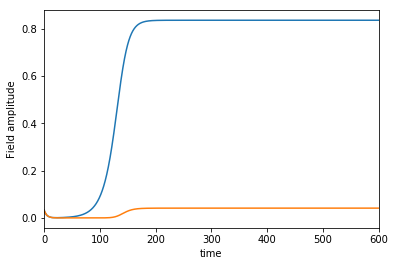

In [40]:
x_A = x_save[0:21:2,:]
x_B = x_save[1:21:2,:]
I_A = np.linalg.norm(x_A, axis=0)
I_B = np.linalg.norm(x_B, axis=0)
print(x_save.shape)
print(x_A.shape)
print(I_A.shape)

plt.plot(tab_t,I_A) 
plt.plot(tab_t,I_B)  
plt.xlim([0,t_max])

plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

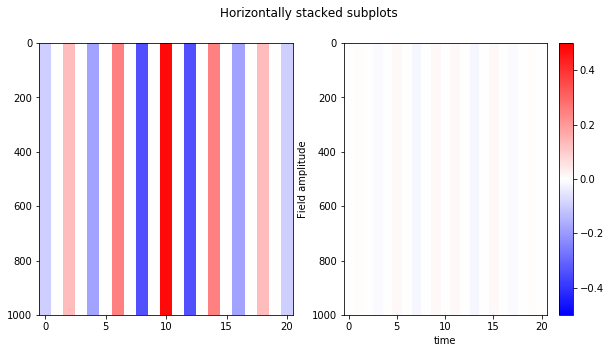

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots')

ax1.imshow(np.real(np.transpose(x_save[:,int((t_max-10)/dt):int(t_max/dt)])),vmin=-0.5, vmax=0.5, interpolation='nearest', aspect='auto',cmap='bwr')
plot2 = ax2.imshow(np.imag(np.transpose(x_save[:,int((t_max-10)/dt):int(t_max/dt)])),vmin=-0.5, vmax=0.5, interpolation='none', aspect='auto',cmap='bwr')

plt.xlabel("time")
plt.ylabel("Field amplitude")
cbar = fig.colorbar(plot2, ax=ax2)
# cbar.minorticks_on()
plt.show()

In [42]:
x,y = 0.16, 0.44   #coordinate in phase diagram 
gamma_AB = x 
gamma_A = gamma_AB
gamma_B = gamma_AB
g_A = gamma_AB + y
g_B = 0

In [43]:
x_save = fp.integrate_RK4(N, g_A, g_B, gamma_A, gamma_B, t1, t2, Nt, tab_t,dt)

(21, 60000)
(11, 60000)
(60000,)


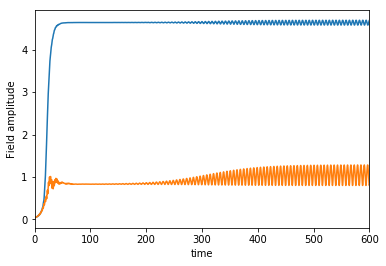

In [44]:
x_A = x_save[0:21:2,:]
x_B = x_save[1:21:2,:]
I_A = np.linalg.norm(x_A, axis=0)
I_B = np.linalg.norm(x_B, axis=0)
print(x_save.shape)
print(x_A.shape)
print(I_A.shape)

plt.plot(tab_t,I_A) 
plt.plot(tab_t,I_B)  
plt.xlim([0,t_max])

plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

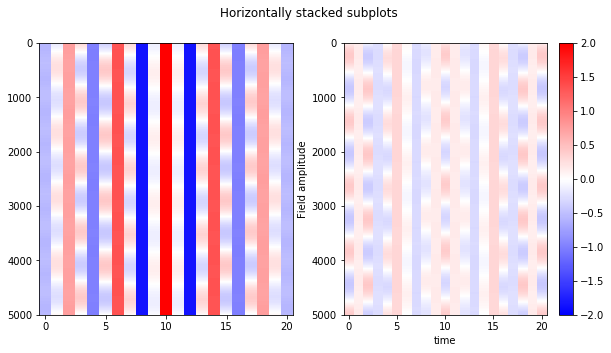

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots')

ax1.imshow(np.real(np.transpose(x_save[:,int((t_max-50)/dt):int(t_max/dt)])),vmin=-2, vmax=2, interpolation='nearest', aspect='auto',cmap='bwr')
plot2 = ax2.imshow(np.imag(np.transpose(x_save[:,int((t_max-50)/dt):int(t_max/dt)])),vmin=-2, vmax=2, interpolation='none', aspect='auto',cmap='bwr')

plt.xlabel("time")
plt.ylabel("Field amplitude")
cbar = fig.colorbar(plot2, ax=ax2)
# cbar.minorticks_on()
plt.show()

# Old ones 

In [5]:
psi_sweep = np.empty((Nt, 2*N)).astype(complex)
psi_sweep = fp.A_scan(tab_A, omega0, eta, theta, A_, B_, N, Nsweep, Nt, tab_t,dt, 0.11, 0.1)

Iter: 60/60


(60, 2, 795)


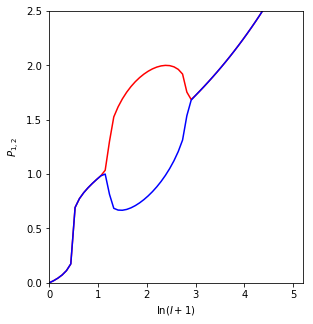

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.log(tab_I+1), np.abs(psi_sweep[:,0:N:1,-1])**2 , color='r')
plt.plot(np.log(tab_I+1), np.abs(psi_sweep[:,N:2*N:1,-1])**2 , color='b')
plt.xlabel('$\ln(I+1)$')
plt.ylabel('$P_{1,2}$')
plt.xlim([0,5.2])
plt.ylim([0,2.5])
print(psi_sweep.shape)

## Time evolution

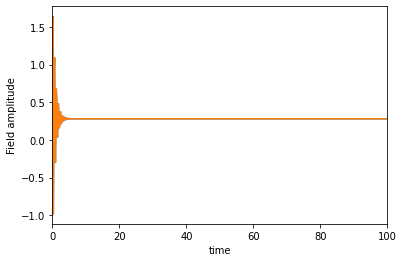

In [10]:
pN = 50
plt.plot(tab_t,psi_sweep[pN,0,:]) 
plt.plot(tab_t,psi_sweep[pN,1,:]) 
plt.xlim([0,t_max])
# plt.xlim([t_max-30,t_max])
plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

In [23]:
N = 1                         #number of rings
v, w = 0.3, 0.4                #coupling strength

omega0 = 1
A_ = 1
B_ = 4 
theta = 5
eta = 1

Nsweep = 60
tab_I = np.exp(np.linspace(0, 5.2, Nsweep))-1
tab_A = np.sqrt(tab_I)
A_probe = 0

Ns = 100
T = 2*np.pi / omega0
dt = T / Ns
t_max = 100
Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)



In [24]:
psi_sweep = np.empty((Nt, 2*N)).astype(complex)
psi_sweep = fp.A_scan(tab_A, omega0, eta, theta, A_, B_, N, Nsweep, Nt, tab_t,dt, 0.11, 0.1)

Iter: 60/60


(60, 2, 1591)


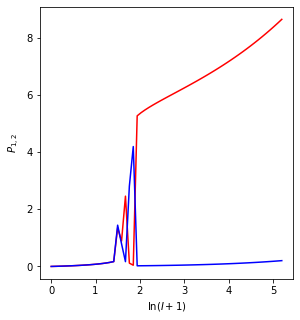

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.log(tab_I+1), np.abs(psi_sweep[:,0:N:1,-1])**2 , color='r')
plt.plot(np.log(tab_I+1), np.abs(psi_sweep[:,N:2*N:1,-1])**2 , color='b')
plt.xlabel('$\ln(I+1)$')
plt.ylabel('$P_{1,2}$')
# plt.xlim([0,5.2])
# plt.ylim([0,2.5])
print(psi_sweep.shape)

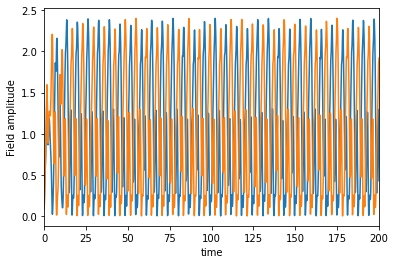

In [34]:
pN = 55
plt.plot(tab_t,np.abs(psi_sweep[pN,0,:])**2) 
plt.plot(tab_t,np.abs(psi_sweep[pN,1,:])**2)  
plt.xlim([0,t_max])
# plt.xlim([t_max-30,t_max])
plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

In [30]:
Nsweep = 100

I = 3.3

tab_B_ = np.linspace(2,7,Nsweep)
A_ = 1
theta = 5

Ns = 50
T = 2*np.pi / omega0
dt = T / Ns
t_max = 200
Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)


In [31]:
psi_sweep = np.empty((Nt, 2*N)).astype(complex)
psi_sweep = fp.B_scan(np.sqrt(I), omega0, eta, theta, A_, tab_B_, N, Nsweep, Nt, tab_t,dt, 0.11, 0.1)

Iter: 100/100


(100, 2, 1591)


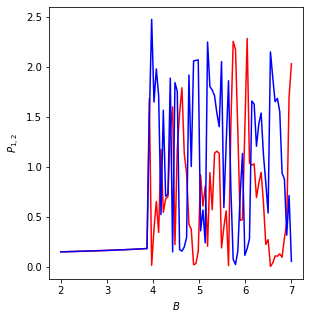

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(tab_B_, np.abs(psi_sweep[:,0:N:1,-1])**2 , color='r')
plt.plot(tab_B_, np.abs(psi_sweep[:,N:2*N:1,-1])**2 , color='b')
plt.xlabel('$B$')
plt.ylabel('$P_{1,2}$')
# plt.xlim([0,5.2])
# plt.ylim([0,2.5])
print(psi_sweep.shape)

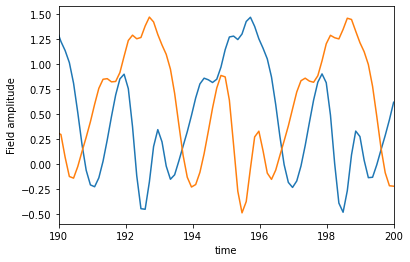

In [36]:
pN = 70
plt.plot(tab_t,psi_sweep[pN,0,:]) 
plt.plot(tab_t,psi_sweep[pN,1,:]) 
plt.xlim([0,t_max])
plt.xlim([t_max-10,t_max])
plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

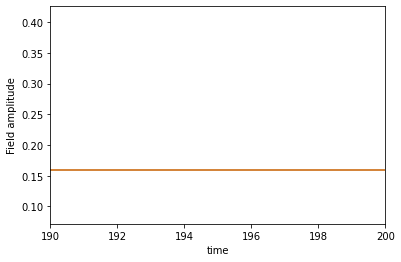

[[0.1591729+0.j 0.1591729+0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]
 [0.       +0.j 0.       +0.j]]


In [63]:
pN = 10

# I1 = abs(psi_sweep[pN,0,:])**2
# I2 = abs(psi_sweep[pN,1,:])**2

I = abs(psi_sweep[pN,:,:])**2 

plt.plot(tab_t,I[0,:]) 
plt.plot(tab_t,I[1,:]) 
plt.xlim([t_max-10,t_max])
# plt.xlim([Nt-60,Nt])
plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

N_max = 20

tab_maxima_I = np.empty((N_max, 2*N)).astype(complex)

k = 0
l = 0 
for j in range(Nt-200,Nt-1):
    for i in range(2):
        dIa = I[i,j]-I[i,j-1]
        dIb = I[i,j+1]-I[i,j]
        if (dIa > 0 and dIb <0):
            print(k, tab_t[j], I[i,j])
            if i==0:
                tab_maxima_I[k,i] = I[i,j]
                k = k+1
            if i==1:
                tab_maxima_I[l,i] = I[i,l]
                l = l+1
                
if tab_maxima_I[0,0] == 0:
    tab_maxima_I[0,0] = I[0,-1]
if tab_maxima_I[0,1] == 0:
    tab_maxima_I[0,1] = I[1,-1]
        
print(tab_maxima_I)
    


# Using the expression of ellipse

## Changing pump intensity

In [6]:
def coeff(A, B, theta):
    D1 = A**2 + B**2 - 2*A*B
    D2 = 3*A**2 - B**2 + 2*A*B
    D3 = (8*A**2 * theta**2)/D2 - 2*(1+theta**2)
    
    r = m.sqrt(D3)    
    a = r/m.sqrt(D1)
    b = r/m.sqrt(D2) 
    h = 2*m.sqrt(2)*A*theta/D2
    return a,b,h
    
def ellipse(A,B,theta):
    a,b,h = coeff(A,B,theta)
    
    phi = np.linspace(0,2*m.pi,100)
    x = a*np.cos(phi)
    y = b*np.sin(phi) + h
    
    xp = 1/m.sqrt(2)*(x + y) 
    yp = 1/m.sqrt(2)*(-x + y) 
    
    return xp,yp

def symmetric(Pmax):
    x = np.linspace(0,Pmax,100)
    y = x
    
    return x,y

def intensity(A,B,theta, P1, P2):
    y = P1 * (1 + (theta - A*P1 - B*P2)**2)
    
    return y 

In [7]:
A=1
B=2
theta=4

P1_asym,P2_asym = ellipse(A,B,theta)
P1_sym,P2_sym = symmetric(10)

I_asym = intensity(A,B,theta,P1_asym, P2_asym)
I_sym = intensity(A,B,theta,P1_sym, P2_sym)

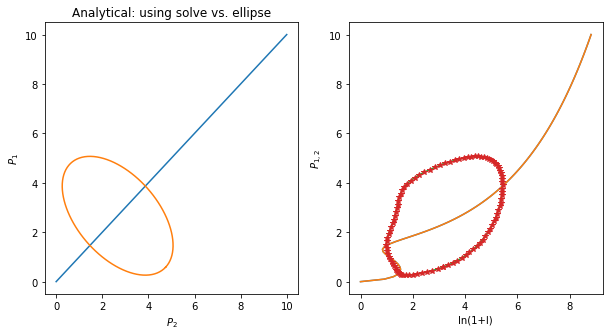

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(P1_sym, P2_sym,"-")  
plt.plot(P1_asym, P2_asym,"-")

# plt.plot(sol_sym[0,:],sol_sym[0,:],"*")
# plt.plot(I_asym_h,I_asym_l,"o")
# plt.plot(I_asym_l,I_asym_h,"o")

# plt.xlim([0,2.5])
# plt.ylim([0.,2.5])
plt.xlabel("$P_2$")
plt.ylabel("$P_1$")
plt.title("Analytical: using solve vs. ellipse")

plt.subplot(1,2,2)
plt.plot(np.log(I_sym+1), P1_sym,"-")
plt.plot(np.log(I_sym+1), P2_sym,"-")
plt.plot(np.log(I_asym+1), P1_asym,"-")
plt.plot(np.log(I_asym+1), P2_asym,"*")

# plt.plot(tab_A, sol_sym[0,:],"*")
# plt.plot(tab_A_h, I_asym_h,"o")
# plt.plot(tab_A_l, I_asym_l,"o")

# plt.xlim([0,5])
# plt.ylim([0.,2.5])
plt.xlabel("ln(1+I)")
plt.ylabel("$P_{1,2}$")

plt.show()